In [83]:
%load_ext autoreload
%autoreload 2

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from PIL import Image
from utils.utils import load_checkpoint, MEAN, STD, normalize_image
from utils.keypoints import augment_upper_body_kpts, extract_keypoints_from_heatmap
from models.models import ViTFashionDetector
import math
from loguru import logger

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
checkpoint_path = "outputs/checkpoint_epoch_30.pth"
model = ViTFashionDetector(num_labels=6)
epochs, losses = load_checkpoint(checkpoint_path, model)
logger.info(f"Loaded model with {sum(p.numel() for p in model.parameters())} parmeters")

2025-03-08 16:38:18.059 | INFO     | utils.utils:load_checkpoint:129 - Loaded model state from outputs/checkpoint_epoch_30.pth
2025-03-08 16:38:18.121 | INFO     | __main__:<module>:4 - Loaded model with 85836294 parmeters


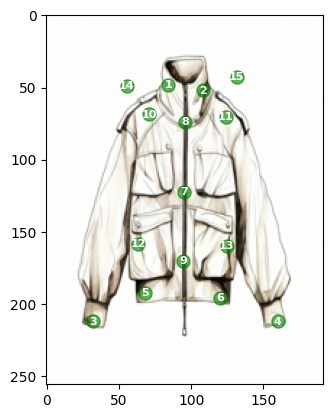

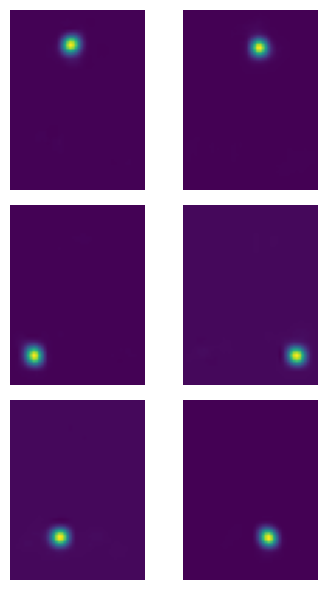

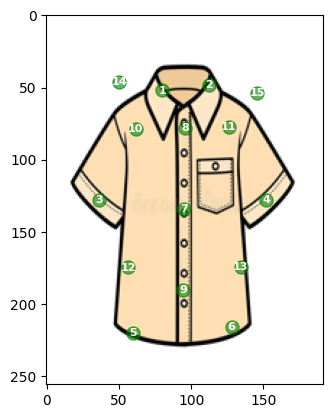

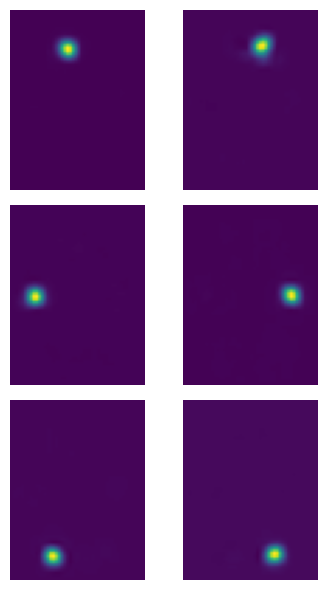

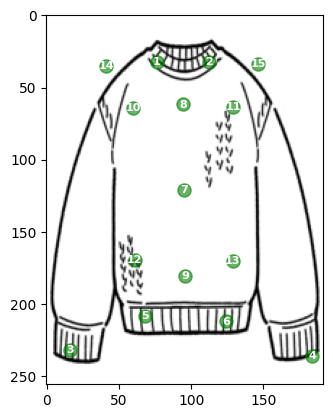

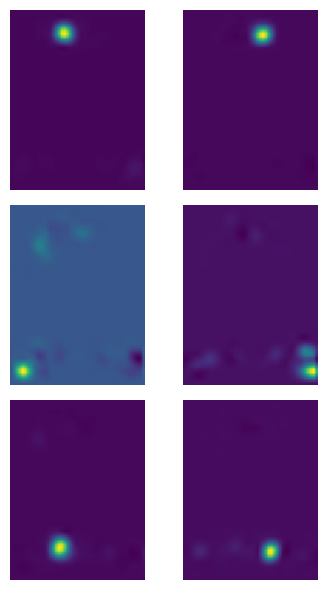

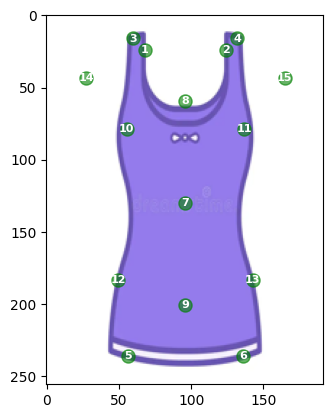

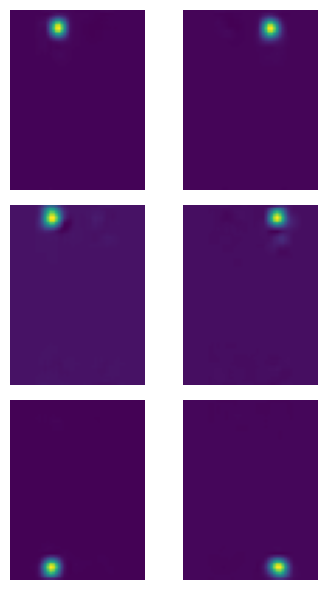

In [126]:
image1 = Image.open('/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/jacket.png')
image2 = Image.open('/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/short_sleeve_shirt.png')
image3 = Image.open('/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/sweater.jpeg')
image4 = Image.open("/Users/johncao/Documents/Programming/Stanford/CS224G/finetune/utils/test_imgs/tanktop.png")

images = [image1, image2, image3,image4]

for image in images:
    normalized_image = normalize_image(image.resize([192,256]))
    x = torch.tensor(normalized_image).permute(2,0,1).unsqueeze(0).float()
    with torch.no_grad():
        out = model(x)
    kpts = extract_keypoints_from_heatmap(out['heatmaps'][0])
    kpts_list = []
    for kp in kpts:
        kpts_list.append([kp[0], kp[1]])

    kpts = torch.tensor(kpts_list)*4
    kpts = augment_upper_body_kpts(kpts)

    labels = np.arange(1,len(kpts)+1)
    fig = plt.figure()
    plt.imshow(normalized_image*STD + MEAN)
    plt.scatter(x=kpts[:,0], y=kpts[:,1], s=90, c='green', alpha=0.6)

    for i in range(len(kpts)):
        plt.text(kpts[i,0], kpts[i,1], str(labels[i]), fontsize=8, color='white', ha='center', va='center', fontweight='bold')
    plt.show()

    N, H, W = out['heatmaps'][0].shape

    # Determine grid size (for example, a square-ish grid)
    cols = int(math.sqrt(N))
    rows = math.ceil(N / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()  # make it easier to iterate

    for i, ax in enumerate(axes):
        if i < N:
            ax.imshow(out['heatmaps'][0][i])  # use cmap='gray' for grayscale images
        ax.axis('off')  # hide the axes

    plt.tight_layout()
    plt.show()


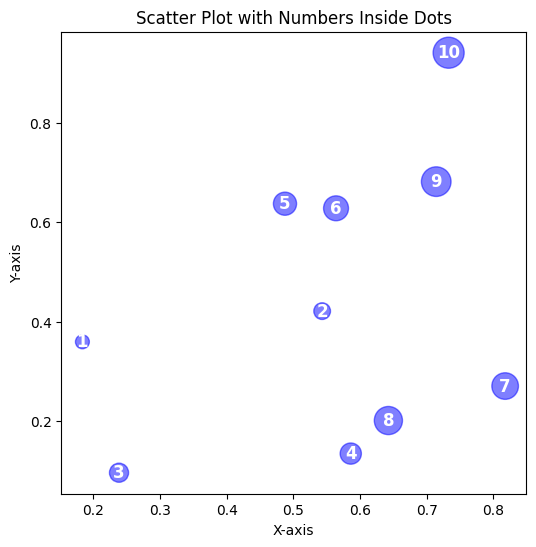

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Random data
x = np.random.rand(10)
y = np.random.rand(10)
sizes = np.linspace(100, 500, 10)  # Marker sizes
labels = np.arange(1, 11)  # Numbers to put inside the dots

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=sizes, c='blue', alpha=0.5)

# Add text inside each point
for i in range(len(x)):
    plt.text(x[i], y[i], str(labels[i]), 
             fontsize=12, color='white', ha='center', va='center', fontweight='bold')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Numbers Inside Dots")
plt.show()


In [100]:
x.shape

(1, 10)